In [1]:
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web
import datetime 
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
start='1985-01'
end='2017-05'

In [3]:
rob = web.DataReader("PCOFFROBUSDM",'fred',start, end)
rob = rob.fillna(method='ffill')

In [4]:
ara = web.DataReader("PCOFFOTMUSDM",'fred',start, end)

In [5]:
ara.head()

,PCOFFOTMUSDM
DATE,
1985-01-01,145.579987
1985-02-01,143.730011
1985-03-01,141.269989
1985-04-01,140.660004
1985-05-01,141.940002


In [6]:
rob['Ret']=(rob['PCOFFROBUSDM'].diff()/rob['PCOFFROBUSDM'].shift(1))*100
rob.head()
ara['Ret']=(ara['PCOFFOTMUSDM'].diff()/ara['PCOFFOTMUSDM'].shift(1))*100
ara.head()

,PCOFFOTMUSDM,Ret
DATE,,
1985-01-01,145.579987,NaN
1985-02-01,143.730011,-1.270762
1985-03-01,141.269989,-1.711558
1985-04-01,140.660004,-0.431787
1985-05-01,141.940002,0.909995


In [7]:
rob['Ret'][0:1]=0
ara['Ret'][0:1]=0

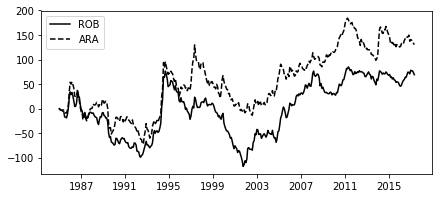

In [8]:
fig = plt.figure(figsize=(7,3)); ax = fig.add_subplot(1, 1, 1)
ax.plot(rob['Ret'].cumsum(), 'k', label='ROB')
ax.plot(ara['Ret'].cumsum(), 'k--', label='ARA')
ax.legend(loc='best')
plt.show()

In [9]:
rob['Ret'].corr(ara['Ret'])

0.75929623953467273

In [10]:
stocks = pd.read_excel('stocks_at_port.xlsx', index_col=0)
stocks.head()

,Stock
DATE,
1997-01-31 00:00:00,21051
1997-02-28 00:00:00,17295
1997-03-31 00:00:00,83328
1997-04-30 00:00:00,43668
1997-05-30 00:00:00,48235


In [11]:
stocks['Ret']=(stocks['Stock'].diff()/stocks['Stock'].shift(1))*100
print (stocks.head())
stocks['Ret'][0:1]=0
print (stocks.head())

                     Stock         Ret
DATE                                  
1997-01-31 00:00:00  21051         NaN
1997-02-28 00:00:00  17295  -17.842383
1997-03-31 00:00:00  83328  381.803990
1997-04-30 00:00:00  43668  -47.595046
1997-05-30 00:00:00  48235   10.458459
                     Stock         Ret
DATE                                  
1997-01-31 00:00:00  21051    0.000000
1997-02-28 00:00:00  17295  -17.842383
1997-03-31 00:00:00  83328  381.803990
1997-04-30 00:00:00  43668  -47.595046
1997-05-30 00:00:00  48235   10.458459


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
ara1 = web.DataReader("PCOFFOTMUSDM",'fred',start='1997-01', end='2017-12')

In [13]:
writer = pd.ExcelWriter('output.xlsx')
ara1.to_excel(writer, 'Sheet1')
writer.save()

In [14]:
com = pd.read_excel('modified1.xlsx', index_col=0)
com.head()

,PCOFFOTMUSDM,Stock
DATE,,
2000-01-01,109.166000,981411
2000-02-01,101.645333,1142037
2000-03-01,97.946000,1568596
2000-04-01,92.564000,1864734
2000-05-01,91.757273,2145925


In [15]:
com['Ret_Ara']=(com['PCOFFOTMUSDM'].diff()/com['PCOFFOTMUSDM'].shift(1))*100
com['Ret_Stock']=(com['Stock'].diff()/com['Stock'].shift(1))*100
com['Ret_Ara'][0:1]=0
com['Ret_Stock'][0:1]=0
com.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,PCOFFOTMUSDM,Stock,Ret_Ara,Ret_Stock
DATE,,,,
2000-01-01,109.166000,981411,0.000000,0.000000
2000-02-01,101.645333,1142037,-6.889202,16.366843
2000-03-01,97.946000,1568596,-3.639452,37.350716
2000-04-01,92.564000,1864734,-5.494865,18.879176
2000-05-01,91.757273,2145925,-0.871535,15.079416


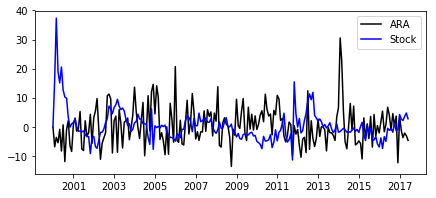

In [16]:
fig = plt.figure(figsize=(7,3)); ax = fig.add_subplot(1, 1, 1)
ax.plot(com['Ret_Ara'], 'k', label='ARA')
ax.plot(com['Ret_Stock'], 'b', label='Stock')
ax.legend(loc='best')
plt.show()

In [17]:
com['Ret_Ara'].corr(com['Ret_Stock'])

-0.1644578748055964

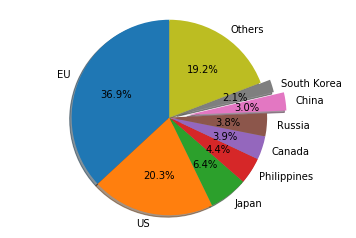

In [18]:
labels = 'EU','US','Japan','Philippines','Canada','Russia','China','South Korea','Others'
sizes = [36.9, 20.3, 6.4, 4.4, 3.9, 3.8, 3.0, 2.1, 19.2 ]
explode = (0,0,0,0,0,0,0.2,0.1,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [19]:
fbd = pd.read_excel('forbigdraw.xlsx', index_col=0, parse_dates=True)
print (fbd.head())
fbd = fbd.sort_index(axis=0, level=None, ascending=True)
print (fbd.head())
cof = rob['PCOFFROBUSDM']
print(cof.head())
#cof = cof.to_frame()
#print(cof.head())

            Robusta Price
Timestamp                
2018-01-18          89.79
2018-01-17          89.79
2018-01-16          87.85
2018-01-15          87.93
2018-01-12          88.24
            Robusta Price
Timestamp                
1985-01-01         125.42
1985-01-02         124.98
1985-01-03         124.66
1985-01-04         124.37
1985-01-07         124.45
DATE
1985-01-01    127.899986
1985-02-01    124.670013
1985-03-01    124.019989
1985-04-01    123.250000
1985-05-01    121.410004
Name: PCOFFROBUSDM, dtype: float64


In [20]:
'''
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
from matplotlib.text import OffsetFrom
'''

'\nimport matplotlib.pyplot as plt\nfrom matplotlib.patches import Ellipse\nimport numpy as np\nfrom matplotlib.text import OffsetFrom\n'

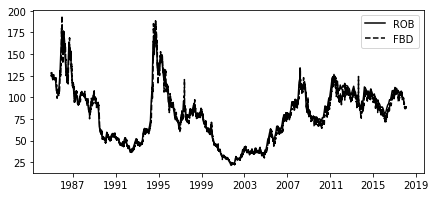

In [21]:
fig = plt.figure(figsize=(7,3)); ax = fig.add_subplot(1, 1, 1)
ax.plot(rob['PCOFFROBUSDM'], 'k', label='ROB')
ax.plot(fbd, 'k--', label='FBD')
ax.legend(loc='best')
plt.show()

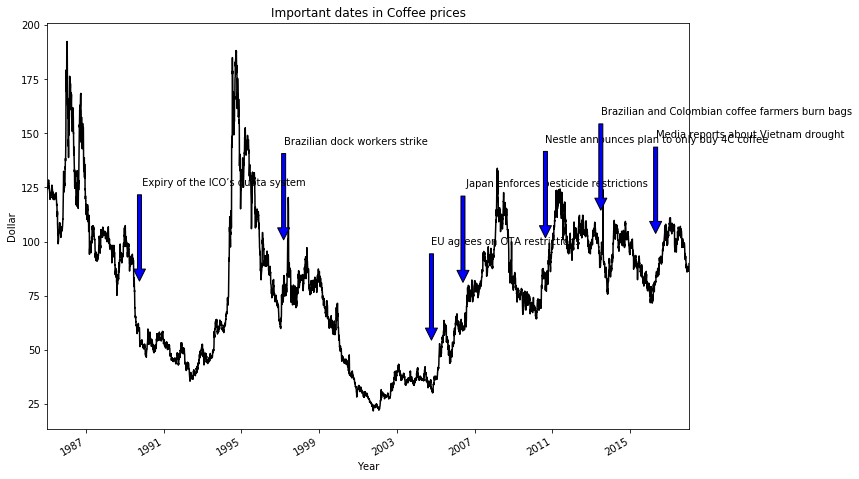

In [42]:
fig=plt.figure(figsize=(11.5,8.3))

ax=fig.add_subplot(1,1,1)


data = pd.read_excel('forbigdraw.xlsx', index_col=0, parse_dates=True)
cof = data['Robusta Price']
cof = cof.sort_index(axis=0, level=None, ascending=True)

# cof = rob['PCOFFROBUSDM']

crisis_data = [
    (datetime(1997,3,4), 'Brazilian dock workers strike'),
    (datetime(2004,10,13), 'EU agrees on OTA restrictions'),
    (datetime(2006,5,29), ' Japan enforces pesticide restrictions'),
    (datetime(1989,9,30), ' Expiry of the ICO’s quota system'),
    (datetime(2010,8,27),'Nestle announces plan to only buy 4C coffee'),
    (datetime(2013,7,4),'Brazilian and Colombian coffee farmers burn bags'),
    (datetime(2016,4,30),'Media reports about Vietnam drought')
]

cof.plot(ax=ax, style='k-')
# cof = rob['PCOFFROBUSDM']

for date, label in crisis_data:
    ax.annotate(label, xy=(date, cof.asof(date)+20), xycoords='data',
               xytext=(date, cof.asof(date)+70),
               arrowprops=dict(facecolor='blue', shrink=0.05),
                horizontalalignment='left', verticalalignment='top'
               ) ;
    
# ax.set_xlim(['01/02/1997', '01/02/2011'])
# ax.set_ylim([0,300])
plt.ylabel('Dollar')
plt.xlabel('Year')
#ax.legend(label, loc='best')
ax.set_title('Important dates in Coffee prices')
plt.show()

In [23]:
#import Quandl
#mydata = quandl.get("LLOYDS/BDI")

In [24]:
sil = pd.read_excel('silverprice.xlsx', sheet_name=1, index_col=0)
sil = sil.fillna(method='ffill')
sil.head()

,Silver Price
Date,
2008-01-17,15.875
2008-01-18,16.175
2008-01-21,15.575
2008-01-22,16.045
2008-01-23,16.065


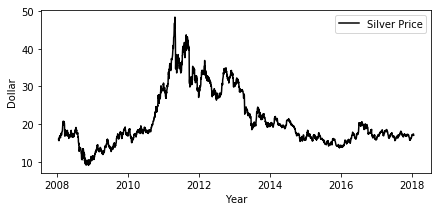

In [25]:
fig = plt.figure(figsize=(7,3)); ax = fig.add_subplot(1, 1, 1)
ax.plot(sil['Silver Price'], 'k', label='Silver Price')
plt.ylabel('Dollar')
plt.xlabel('Year')
ax.legend(loc='best')
plt.show()

In [26]:
msci = pd.read_excel('msci.xlsx', sheet_name=1, index_col=0)
msci = msci.fillna(method='ffill')
msci.tail()

,MSCI World
Date,
2018-01-12,2185.312
2018-01-15,2193.946
2018-01-16,2188.391
2018-01-17,2199.930
2018-01-18,2196.728


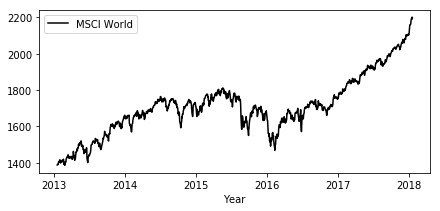

In [27]:
fig = plt.figure(figsize=(7,3)); ax = fig.add_subplot(1, 1, 1)
ax.plot(msci['MSCI World'], 'k', label='MSCI World')
plt.xlabel('Year')
ax.legend(loc='best')
plt.show()

In [28]:
dsil = pd.read_excel('dsil.xlsx', sheet_name=1, index_col=0)
dsil = dsil.fillna(method='ffill')
dsil.tail()
# million ounces

,Coins/Bars,Jewellery,Photography,Solar Panels
2014-06-30,234.033,227.882,48.471,51.793
2015-06-30,290.699,228.272,46.564,57.202
2016-06-30,206.768,206.975,45.173,76.589
2017-06-30,202.022,212.665,44.386,78.816
2018-06-30,195.962,219.471,43.498,75.450


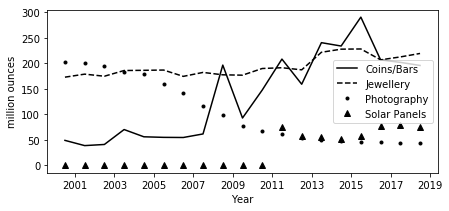

In [29]:
fig = plt.figure(figsize=(7,3)); ax = fig.add_subplot(1, 1, 1)
ax.plot(dsil['Coins/Bars'], 'k', label='Coins/Bars')
ax.plot(dsil['Jewellery'], 'k--', label='Jewellery')
ax.plot(dsil['Photography'], 'k.', label='Photography')
ax.plot(dsil['Solar Panels'], 'k^', label='Solar Panels')
plt.xlabel('Year')
plt.ylabel('million ounces')
ax.legend(loc='best')
plt.show()

In [30]:
bmin = pd.read_excel('bmin.xlsx', sheet_name=1, index_col=0)
bmin.tail()

,BRL
Date,
2012,2762
2013,2835
2014,2847
2015,2842
2016,2919


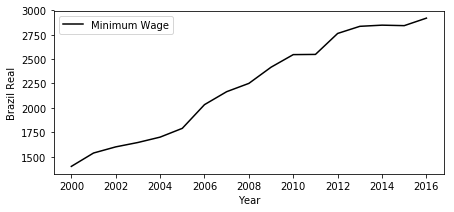

In [32]:
fig = plt.figure(figsize=(7,3)); ax = fig.add_subplot(1, 1, 1)
ax.plot(bmin['BRL'], 'k', label='Minimum Wage')
plt.ylabel('Brazil Real')
plt.xlabel('Year')
ax.legend(loc='best')
plt.show()

In [43]:
forex = pd.read_excel('forex.xlsx', sheet_name=1, index_col=0)
forex.tail()

,ICO Robusta Index,USD/BRL,USD/IDR,Crude Oil (WTI)
Date,,,,
2018-01-11,160.828142,175.035384,187.896213,256.122039
2018-01-12,161.670942,174.540011,187.237027,258.129265
2018-01-16,160.956394,175.514426,187.054698,255.841028
2018-01-17,164.510810,175.487207,187.307153,256.804496
2018-01-18,164.510810,174.654328,187.166900,256.884785


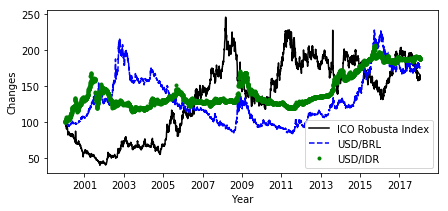

In [51]:
fig = plt.figure(figsize=(7,3)); ax = fig.add_subplot(1, 1, 1)
ax.plot(forex['ICO Robusta Index'], 'k', label='ICO Robusta Index')
ax.plot(forex['USD/BRL'], 'b--', label='USD/BRL')
ax.plot(forex['USD/IDR'], 'g.', label='USD/IDR')
plt.xlabel('Year')
plt.ylabel('Changes')
ax.legend(loc='best')
plt.show()

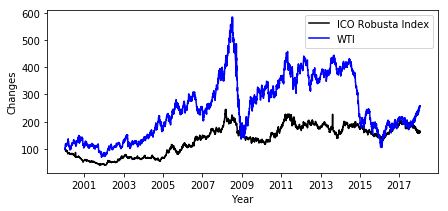

In [48]:
fig = plt.figure(figsize=(7,3)); ax = fig.add_subplot(1, 1, 1)
ax.plot(forex['ICO Robusta Index'], 'k', label='ICO Robusta Index')
ax.plot(forex['Crude Oil (WTI)'], 'b-', label='WTI')
plt.xlabel('Year')
plt.ylabel('Changes')
ax.legend(loc='best')
plt.show()

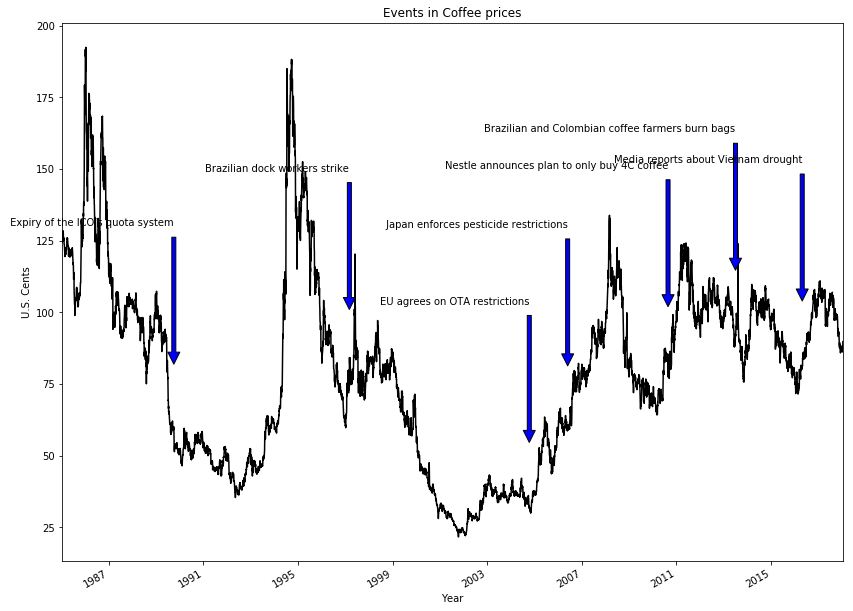

In [62]:
fig=plt.figure(figsize=(14,11))

ax=fig.add_subplot(1,1,1)


data = pd.read_excel('forbigdraw.xlsx', index_col=0, parse_dates=True)
cof = data['Robusta Price']
cof = cof.sort_index(axis=0, level=None, ascending=True)

# cof = rob['PCOFFROBUSDM']

crisis_data = [
    (datetime(1997,3,4),  'Brazilian dock workers strike'),
    (datetime(2004,10,13),  'EU agrees on OTA restrictions'),
    (datetime(2006,5,29),  ' Japan enforces pesticide restrictions'),
    (datetime(1989,9,30),  ' Expiry of the ICO’s quota system'),
    (datetime(2010,8,27), 'Nestle announces plan to only buy 4C coffee'),
    (datetime(2013,7,4), 'Brazilian and Colombian coffee farmers burn bags'),
    (datetime(2016,4,30), 'Media reports about Vietnam drought')
]

cof.plot(ax=ax, style='k-')
# cof = rob['PCOFFROBUSDM']

for date, label in crisis_data:
    ax.annotate(label, xy=(date, cof.asof(date)+20), xycoords='data',
               xytext=(date, cof.asof(date)+70),
               arrowprops=dict(facecolor='blue', shrink=0.05),
                horizontalalignment='right', verticalalignment='bottom')
    
    
# ax.set_xlim(['01/02/1997', '01/02/2011'])
# ax.set_ylim([0,300])
plt.ylabel('U.S. Cents')
plt.xlabel('Year')
#ax.legend(label, loc='best')
ax.set_title('Events in Coffee prices')
plt.show()